In [49]:
import pandas as pd
import numpy as np

# Definir los datos proporcionados
numero_de_lectura = np.arange(1, 21)
volumen_jeringa_mL = np.array([6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0])
altura_columna_mm = np.array([8.90, 10.1, 11.1, 12.0, 13.0, 14.3, 15.2, 16.4, 17.4, 18.4, 19.6, 20.8, 21.8, 23.0, 24.1, 25.4, 27.0, 28.5, 29.5, 30.6])

# Calcular Volumen del Aire (Va) y 1/Va
volumen_agua_mL = 2/3 * volumen_jeringa_mL
volumen_capilar_mL = volumen_agua_mL - volumen_jeringa_mL
volumen_aire_mL = volumen_jeringa_mL - volumen_capilar_mL - volumen_agua_mL
inverso_volumen_aire_mL = 1 / volumen_aire_mL

# Calcular Presión del Aire (Pa)
altura_columna_mm = altura_columna_mm - altura_columna_mm[0]  # Corregir altura inicial
presion_atm_mmHg = 760  # Presión atmosférica en mm de Hg
presion_aire_mmHg = presion_atm_mmHg + (altura_columna_mm / 13.6)

# Crear el DataFrame
data = {
    "Numero de Lectura": numero_de_lectura,
    "Volumen de la Jeringa (mL)": volumen_jeringa_mL,
    "Volumen del Aire (Va) (mL)": volumen_aire_mL,
    "Altura de la Columna (hc) (mm)": altura_columna_mm,
    "1/Va (mL^-1)": inverso_volumen_aire_mL,
    "Presion del Aire (Pa) (mm de Hg)": presion_aire_mmHg
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
df


,Numero de Lectura,Volumen de la Jeringa (mL),Volumen del Aire (Va) (mL),Altura de la Columna (hc) (mm),1/Va (mL^-1),Presion del Aire (Pa) (mm de Hg)
0,1,6.2,4.133333,0.0,0.241935,760.000000
1,2,6.4,4.266667,1.2,0.234375,760.088235
2,3,6.6,4.400000,2.2,0.227273,760.161765
3,4,6.8,4.533333,3.1,0.220588,760.227941
4,5,7.0,4.666667,4.1,0.214286,760.301471
5,6,7.2,4.800000,5.4,0.208333,760.397059
6,7,7.4,4.933333,6.3,0.202703,760.463235
7,8,7.6,5.066667,7.5,0.197368,760.551471
8,9,7.8,5.200000,8.5,0.192308,760.625000
9,10,8.0,5.333333,9.5,0.187500,760.698529


Pendiente (m) = -17.266015322672164
Termino independiente (b) = 764.0334397356603


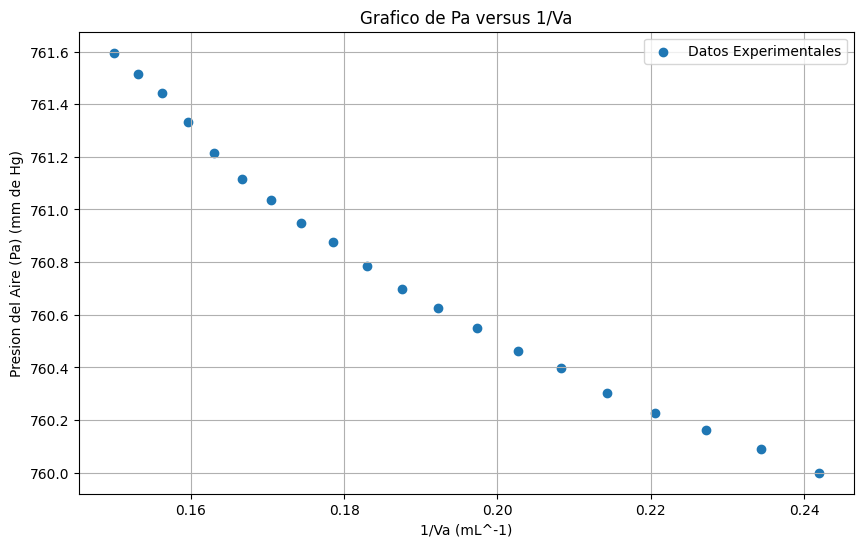

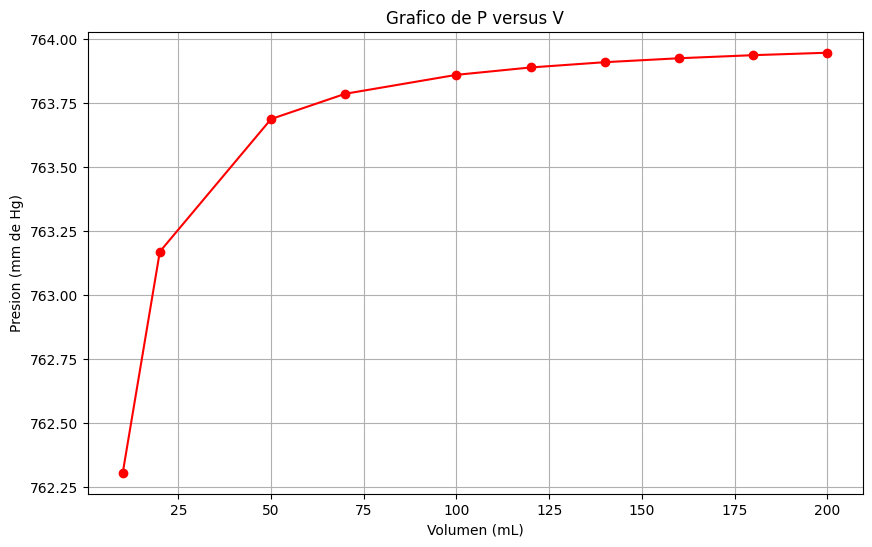

In [50]:
import matplotlib.pyplot as plt

# 1. Graficar Pa versus 1/Va
plt.figure(figsize=(10, 6))
plt.scatter(df["1/Va (mL^-1)"], df["Presion del Aire (Pa) (mm de Hg)"], label="Datos Experimentales")
plt.xlabel("1/Va (mL^-1)")
plt.ylabel("Presion del Aire (Pa) (mm de Hg)")
plt.title("Grafico de Pa versus 1/Va")
plt.legend()
plt.grid(True)

# 2. Calcular la pendiente m y el valor b para P = m * (1/Va) + b
from scipy.optimize import curve_fit

def linear_fit(x, m, b):
    return m * x + b

x_data = df["1/Va (mL^-1)"]
y_data = df["Presion del Aire (Pa) (mm de Hg)"]

params, _ = curve_fit(linear_fit, x_data, y_data)
m, b = params

# 3. Calcular P para valores específicos de V
V_values = np.array([10, 20, 50, 70, 100, 120, 140, 160, 180, 200])
P_values = m * (1 / V_values) + b

# 4. Imprimir los resultados
print("Pendiente (m) =", m)
print("Termino independiente (b) =", b)

# 5. Graficar P versus V
plt.figure(figsize=(10, 6))
plt.plot(V_values, P_values, marker="o", linestyle="-", color="r")
plt.xlabel("Volumen (mL)")
plt.ylabel("Presion (mm de Hg)")
plt.title("Grafico de P versus V")
plt.grid(True)

# Mostrar los gráficos
plt.show()


In [51]:
# Listar las columnas disponibles en el DataFrame
print(df.columns)


Index(['Numero de Lectura', 'Volumen de la Jeringa (mL)',
       'Volumen del Aire (Va) (mL)', 'Altura de la Columna (hc) (mm)',
       '1/Va (mL^-1)', 'Presion del Aire (Pa) (mm de Hg)'],
      dtype='object')
